# Tree Growth  based  Graph Algorithms

These class of algorithms takes a Graph as input, and generates Tree, which consists of some of edges of input Graph, which are selected according to particular criteria. Some examples are
    
- DFS
- BFS
- Minimum Spanning Tree Problem (Prim's and Kruskal's Algorithm)
- Single Source Shortest Path Problem (Dijkstra's Algorithm)

## Standard `import` statement

In [1]:
import OpenAnalysis.tree_growth as TreeGrowth

## Implementation Notes

- The algorithm should be implemented as a method
- The algorithm works on a `networkx` graph
- All algorithms start building the tree from a given source, But if source is not given, select source as the first node of Graph
    
```python
    def algorithm_name(G,source = None):
        if source is None:
            source = G.nodes()[0]
        # do other work now
```
- As soon as node `v` is visited from node `u`, `yield` the tuple containing them

```python
        # Assume that visiting is done
        yield (u,v)
```

- To make your life easy, some data structures which comes handy while working with Graphs are included in `OpenAnalysis.base_data_structures`

## Example - Dijkstra's  Algorithm

 Dijkstra's  Algorithm finds minimum spanning tree of a graph in greedy manner. The algorithm is given below
 
![Algo](../res/dijkstra.jpg)

## Implementation

Since we need a Priority Queue here, Let's `import` it

In [2]:
from OpenAnalysis.base_data_structures import PriorityQueue

Now, Let's implement the algorithm

In [3]:
def dijkstra(G, source=None):                 # This signature is must
    if source is None: source = G.nodes()[0]  # selecting root as source
    V = G.nodes()
    dist, prev = {}, {}
    Q = PriorityQueue()
    for v in V:
        dist[v] = float("inf")
        prev[v] = None
        Q.add_task(task=v, priority=dist[v])
    dist[source] = 0
    Q.update_task(task=source, new_priority=dist[source])
    visited = set()
    for i in range(0, len(G.nodes())):
        u_star = Q.remove_min()
        if prev[u_star] is not None:
            yield (u_star, prev[u_star])    # yield the edge as soon as we visit the nodes
        visited.add(u_star)
        for u in G.neighbors(u_star):
            if u not in visited and dist[u_star] + G.edge[u][u_star]['weight'] < dist[u]:
                dist[u] = dist[u_star] + G.edge[u][u_star]['weight']
                prev[u] = u_star
                Q.update_task(u, dist[u])

Note how implementation looks similiar to the algorithm, except the `if` block, which is used to `yield` the edges.

## Visualizing the Algorithm

- `apply_to_graph(fun)`: Creates Random Geometric Graph of 100 nodes and applies `fun` on it to build the tree. After building the tree, it shows original graph and the tree side by side
- `tree_growth_visualizer(fun)`:  Creates Random Geometric Graph of 100 nodes and applies `fun` on it to build the tree. Saves the animation of building the tree in `output/` folder

## Random Geometric Graph

Random Geometric Graph is created using two parameters. Number of nodes $n$, and radiuus $r$. $n$ points are chosen randomly on plane. The edge between 2 nodes is created if and only if the distance between 2 nodes is less than $r$

```python
    import networkx
    G = nx.random_geometric_graph(100,2.3) # n,r
    pos = nx.get_node_attribute('pos')
```

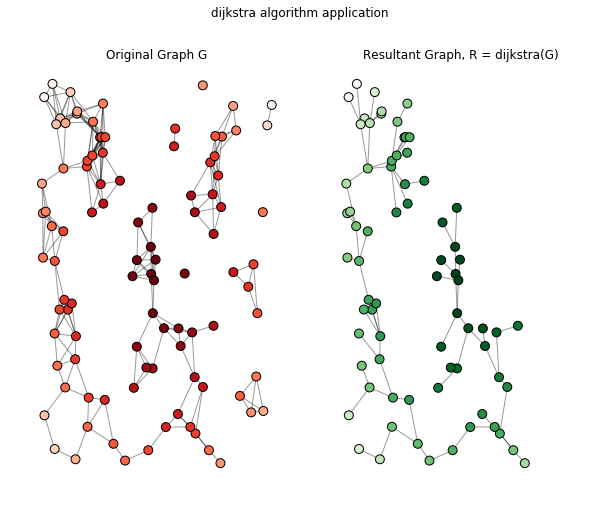

In [9]:
TreeGrowth.apply_to_graph(dijkstra)

After executing

    TreeGrowth.tree_growth_visualizer(dijkstra)

go to `output/` directory to see the mp4 files

## Example File

You can see more examples at [Github](https://github.com/OpenWeavers/OpenAlgorithm/blob/master/Python/AnalysisTest/tree_growth.py)